## Normalización

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv('../archivos/cos_of_living_notnull.csv', index_col = 0)

In [3]:
df.head(2)

,city,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1


In [4]:
df['Basic'].isnull().sum()

0

1- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

<AxesSubplot:xlabel='Basic', ylabel='Count'>

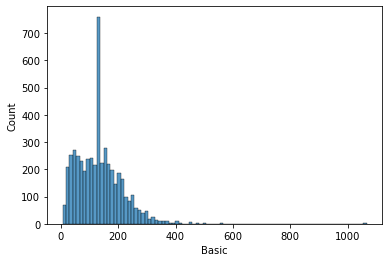

In [5]:
sns.histplot(df['Basic'])

In [6]:
stats.shapiro(df["Basic"])

ShapiroResult(statistic=0.9127979278564453, pvalue=0.0)

In [7]:
df['Basic_boxcox'], lambda_ajustada = stats.boxcox(df['Basic'])

In [15]:
stats.shapiro(df["Basic_boxcox"])

ShapiroResult(statistic=0.9879545569419861, pvalue=3.6803695295533576e-20)

<AxesSubplot:xlabel='Basic_boxcox', ylabel='Count'>

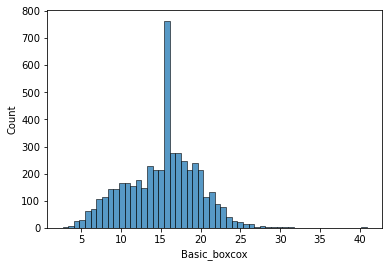

In [16]:
sns.histplot(df['Basic_boxcox'])

In [10]:
lambda_ajustada

0.413901823854206

In [11]:
df.head()

,city,country,Meal_Inexpensive_Restaurant,Mealfor2_Midrange_Restaurant,McMeal_at_McDonalds,Cappuccino,Milk_1l,Rice_1kg,Eggs_12uds,Chicken_Fillets_1kg,Beef_Round_1kg,Water_1.5l_market,Wine_market,Domestic_Beer_0.5l_market,Imported_Beer_0.33l_market,Cigarettes_20_Pack_Marlboro,One-way_Ticket_Local_Transport,Monthly_Pass_Regular_Price,Taxi_1km_Normal_Tariff,Gasoline_1l,Basic,Prepaid_Mobile,Internet,Gym_Monthly,Cinema_1Seat,Preschool_Monthly,Primary_School_Yearly,Apt_1bed_inCentre,Apt_1bed_OutsideCentre,Apt_3beds_inCentre,Apt_3beds_OutsideCentre,Price_per_Square_Meter_inCentre,Price_per_Square_Meter_OutsideCentre,Average_Monthly_Net_Salary,Mortgage_Interest_Rate_%_Yearly_20_Years,data_quality,Basic_boxcox
0,Seoul,South Korea,7.68,53.78,6.15,3.93,2.20,3.53,4.04,10.58,41.61,1.05,15.36,2.12,2.36,3.46,1.00,42.25,0.92,1.43,182.13,0.16,22.48,55.88,9.60,404.15,17902.55,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,18.413460
1,Shanghai,China,5.69,39.86,5.69,3.98,2.74,1.22,2.22,4.86,13.12,0.64,14.24,0.94,1.97,3.56,0.57,28.47,0.43,1.20,66.00,0.03,17.07,63.49,8.54,1382.62,26379.45,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,11.268036
2,Guangzhou,China,4.13,28.47,4.98,3.54,1.91,1.03,1.71,3.77,11.75,0.51,11.39,0.95,2.26,3.70,0.36,28.47,0.37,1.19,59.65,0.02,16.66,34.17,8.54,555.18,24556.21,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,10.706906
3,Mumbai,India,3.68,18.42,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.35,9.83,2.27,3.61,4.30,0.25,4.91,0.31,1.35,43.57,0.01,9.33,25.37,4.30,107.07,3682.67,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,9.106963
4,Delhi,India,4.91,22.11,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.36,9.83,1.54,2.49,4.30,0.49,11.67,0.22,1.24,58.07,0.01,7.95,21.20,4.91,74.00,1964.24,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,10.561901


- Nuestra variable dependiente no puede normalizarse.

### Probamos a normalizar otra variable como práctica

In [12]:
df_num = df.select_dtypes(include = np.number)

In [13]:
for col in df_num.columns:
    if stats.shapiro(df[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(df_num[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(df_num[col])[1]}')
    print('--------------------------------------------------------')

Meal_Inexpensive_Restaurant SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Mealfor2_Midrange_Restaurant SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
McMeal_at_McDonalds SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Cappuccino SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Milk_1l SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Rice_1kg SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Eggs_12uds SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Chicken_Fillets_1kg SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Beef_Round_1kg SÍ tiene distribución normal -> 1.0
--------------------------------------------------------
Water_1.5l_m

2- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [14]:
df.to_csv('../archivos/cost_of_living_NOnormalizado.csv')